In [1]:
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torch as torch
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

def sliding_mean(arr, p=4):
    L =[sum(arr[:p])/p]
    
    for i in range(len(arr)-p):
        L.append( (L[-1]*p+arr[p+i]-arr[i])/p)
    return L


## UTILS

In [2]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)


Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /Users/nissim/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /Users/nissim/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:03<00:00, 32.6MB/s]


In [22]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, "rb") as f:
        with Image.open(f) as img:
            return img.convert("RGB")

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

# data_transforms_train = transforms.Compose(
#     [
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomResizedCrop((224,224),scale=(1,1),ratio=(0.1,0.1)),

#         # transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
#         # transforms.RandomCrop(224, pad_if_needed=True),
#         transforms.ColorJitter(brightness=(0.9,1.1), contrast=(0.5,1.5), saturation=(0.5,1.5), hue=(-0.05,0.05)),

#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ]
# )

data_transforms_train = transforms.Compose(
    [
        transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),


    ]
)
data_transforms = transforms.Compose(
    [
      
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [26]:
%matplotlib qt
im = pil_loader('bird_dataset2/train_images/004.Groove_billed_Ani/Groove_Billed_Ani_0002_1670.jpg')
n=8

w = torch.randn(n,3,224,224)
for i in range(n):
    w[i,:,:,:]=data_transforms_train(im)
# ims = [data_transforms_train(im) for i in range(n)]
grid = make_grid(w, nrow=4)
show(grid)
w.shape


torch.Size([8, 3, 224, 224])

## FIRST TRIES

In [10]:
from torch import tensor

err_em3_norm_randomcrop=[tensor(3.8835), tensor(8.7379), tensor(17.4757), tensor(27.1845), tensor(30.0971), tensor(34.9515), tensor(38.8350), tensor(39.8058), tensor(43.6893), tensor(44.6602), tensor(48.5437), tensor(49.5146), tensor(53.3981), tensor(55.3398), tensor(60.1942), tensor(64.0777), tensor(64.0777), tensor(66.9903), tensor(69.9029), tensor(67.9612), tensor(70.8738), tensor(70.8738), tensor(70.8738), tensor(73.7864), tensor(72.8155), tensor(72.8155), tensor(74.7573), tensor(73.7864), tensor(74.7573), tensor(76.6990), tensor(75.7282), tensor(75.7282), tensor(75.7282), tensor(76.6990), tensor(77.6699), tensor(76.6990), tensor(76.6990), tensor(77.6699), tensor(77.6699), tensor(76.6990)]
err_em3_norm_norand = [tensor(4.8544), tensor(10.6796), tensor(18.4466), tensor(26.2136), tensor(33.0097), tensor(37.8641), tensor(44.6602), tensor(47.5728), tensor(49.5146), tensor(55.3398), tensor(55.3398), tensor(56.3107), tensor(60.1942), tensor(66.0194), tensor(66.0194), tensor(68.9320), tensor(68.9320), tensor(69.9029), tensor(69.9029), tensor(70.8738), tensor(69.9029), tensor(69.9029), tensor(73.7864), tensor(73.7864), tensor(75.7282), tensor(75.7282), tensor(74.7573), tensor(75.7282), tensor(76.6990), tensor(75.7282), tensor(76.6990), tensor(78.6408), tensor(76.6990), tensor(77.6699), tensor(77.6699), tensor(78.6408), tensor(77.6699), tensor(77.6699), tensor(78.6408), tensor(77.6699)]

err_em2_norm_rand = [38.83495330810547, 66.01941680908203, 66.01941680908203, 69.90291595458984, 77.66990661621094, 77.66990661621094, 77.66990661621094, 79.61164855957031, 77.66990661621094, 78.64077758789062, 80.58252716064453, 79.61164855957031, 80.58252716064453, 82.5242691040039, 82.5242691040039, 82.5242691040039, 81.55339813232422, 81.55339813232422, 82.5242691040039, 82.5242691040039, 81.55339813232422, 82.5242691040039, 79.61164855957031, 82.5242691040039, 84.46601867675781, 83.49514770507812, 83.49514770507812, 83.49514770507812, 84.46601867675781, 84.46601867675781, 82.5242691040039, 84.46601867675781, 82.5242691040039, 82.5242691040039, 80.58252716064453, 81.55339813232422, 85.4368896484375, 82.5242691040039, 82.5242691040039, 83.49514770507812]
err_0p005_norm_rand=[19.417476654052734, 54.36893081665039, 56.3106803894043, 55.339805603027344, 66.99028778076172, 78.64077758789062, 73.78640747070312, 78.64077758789062, 75.72815704345703, 75.72815704345703, 78.64077758789062, 75.72815704345703, 80.58252716064453, 78.64077758789062, 79.61164855957031, 78.64077758789062, 78.64077758789062, 79.61164855957031, 80.58252716064453, 80.58252716064453, 78.64077758789062, 79.61164855957031, 80.58252716064453, 80.58252716064453, 78.64077758789062, 79.61164855957031, 80.58252716064453, 81.55339813232422, 83.49514770507812, 81.55339813232422, 80.58252716064453, 83.49514770507812, 81.55339813232422, 80.58252716064453, 82.5242691040039, 82.5242691040039, 83.49514770507812, 82.5242691040039, 83.49514770507812, 81.55339813232422, 81.55339813232422, 82.5242691040039, 83.49514770507812, 82.5242691040039, 83.49514770507812, 84.46601867675781, 82.5242691040039, 81.55339813232422, 82.5242691040039, 81.55339813232422, 82.5242691040039, 83.49514770507812, 83.49514770507812, 83.49514770507812, 84.46601867675781, 84.46601867675781, 83.49514770507812, 83.49514770507812, 84.46601867675781, 82.5242691040039, 85.4368896484375, 83.49514770507812, 82.5242691040039, 83.49514770507812, 82.5242691040039, 83.49514770507812, 84.46601867675781, 84.46601867675781, 82.5242691040039, 81.55339813232422, 82.5242691040039, 83.49514770507812, 83.49514770507812, 82.5242691040039, 83.49514770507812, 84.46601867675781, 83.49514770507812, 82.5242691040039, 83.49514770507812, 83.49514770507812]


# train last 10 layers
err_0p001_last10 = [4.854369163513184, 14.563106536865234, 25.242717742919922, 38.83495330810547, 42.71844482421875, 47.57281494140625, 50.485435485839844, 55.339805603027344, 57.28155517578125, 62.135921478271484, 70.87378692626953, 71.84465789794922, 72.81553649902344, 72.81553649902344, 74.75727844238281, 74.75727844238281, 78.64077758789062, 78.64077758789062, 79.61164855957031, 77.66990661621094, 79.61164855957031, 79.61164855957031, 77.66990661621094, 79.61164855957031, 78.64077758789062, 79.61164855957031, 78.64077758789062, 78.64077758789062, 79.61164855957031, 78.64077758789062, 79.61164855957031, 80.58252716064453, 81.55339813232422, 81.55339813232422, 80.58252716064453, 81.55339813232422, 80.58252716064453, 80.58252716064453, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 81.55339813232422, 82.5242691040039]

err_0p0005_last_10 =[3.8834950923919678, 4.854369163513184, 8.73786449432373, 14.563106536865234, 19.417476654052734, 26.213592529296875, 31.067960739135742, 35.92232894897461, 40.77669906616211, 43.6893196105957, 43.6893196105957, 46.6019401550293, 49.514564514160156, 52.42718505859375, 55.339805603027344, 55.339805603027344, 57.28155517578125, 59.22330093383789, 62.135921478271484, 65.04854583740234, 68.93203735351562, 70.87378692626953, 70.87378692626953, 70.87378692626953, 72.81553649902344, 72.81553649902344, 72.81553649902344, 73.78640747070312, 75.72815704345703, 74.75727844238281, 76.69902801513672, 76.69902801513672, 76.69902801513672, 78.64077758789062, 76.69902801513672, 77.66990661621094, 78.64077758789062, 77.66990661621094, 79.61164855957031, 78.64077758789062, 79.61164855957031, 78.64077758789062, 77.66990661621094, 79.61164855957031, 77.66990661621094, 79.61164855957031, 78.64077758789062, 78.64077758789062, 78.64077758789062, 78.64077758789062, 78.64077758789062, 78.64077758789062, 79.61164855957031, 77.66990661621094, 78.64077758789062, 78.64077758789062, 78.64077758789062, 78.64077758789062, 79.61164855957031, 78.64077758789062, 78.64077758789062, 78.64077758789062, 80.58252716064453, 80.58252716064453, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 82.5242691040039, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 81.55339813232422, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039]


plt.grid(True, axis='y')
L = [err_em3_norm_randomcrop,err_em3_norm_norand,err_em2_norm_rand,err_0p005_norm_rand,err_0p001_last10,err_0p0005_last_10]
L2 = ["err_em3_norm_randomcrop","err_em3_norm_norand","err_em2_norm_rand","err_0p005_norm_rand","err_0p001_last10","err_0p0005_last_10"]
for e,f in zip(L,L2):
    plt.plot(e, label=f)

plt.legend()



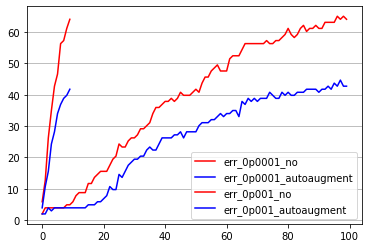

In [11]:
# AUGMENTATION, NO NORMALIZATION, MOMENTUM =0.5

%matplotlib inline

L=[]
L.append(["err_0p0001_no",[1.9417475461959839, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 4.854369163513184, 4.854369163513184, 5.825242519378662, 7.7669901847839355, 8.73786449432373, 8.73786449432373, 8.73786449432373, 11.650485038757324, 11.650485038757324, 13.592232704162598, 14.563106536865234, 15.533980369567871, 15.533980369567871, 15.533980369567871, 17.47572898864746, 19.417476654052734, 20.388349533081055, 24.2718448638916, 23.30097007751465, 23.30097007751465, 25.242717742919922, 26.213592529296875, 26.213592529296875, 27.184465408325195, 29.12621307373047, 29.12621307373047, 30.097087860107422, 31.067960739135742, 33.98058319091797, 35.92232894897461, 35.92232894897461, 36.89320373535156, 37.864078521728516, 37.864078521728516, 38.83495330810547, 37.864078521728516, 38.83495330810547, 40.77669906616211, 39.805824279785156, 39.805824279785156, 39.805824279785156, 40.77669906616211, 41.74757385253906, 40.77669906616211, 43.6893196105957, 45.63106918334961, 45.63106918334961, 47.57281494140625, 48.5436897277832, 49.514564514160156, 47.57281494140625, 47.57281494140625, 47.57281494140625, 51.4563102722168, 52.42718505859375, 52.42718505859375, 52.42718505859375, 54.36893081665039, 56.3106803894043, 56.3106803894043, 56.3106803894043, 56.3106803894043, 56.3106803894043, 56.3106803894043, 56.3106803894043, 57.28155517578125, 56.3106803894043, 56.3106803894043, 57.28155517578125, 57.28155517578125, 58.25242614746094, 59.22330093383789, 61.16504669189453, 59.22330093383789, 58.25242614746094, 59.22330093383789, 61.16504669189453, 62.135921478271484, 60.194175720214844, 61.16504669189453, 61.16504669189453, 62.135921478271484, 61.16504669189453, 61.16504669189453, 63.10679626464844, 63.10679626464844, 63.10679626464844, 63.10679626464844, 65.04854583740234, 64.07766723632812, 65.04854583740234, 64.07766723632812]
])

L.append(["err_0p0001_autoaugment",[1.9417475461959839, 1.9417475461959839, 3.8834950923919678, 2.912621259689331, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 3.8834950923919678, 4.854369163513184, 4.854369163513184, 4.854369163513184, 5.825242519378662, 5.825242519378662, 6.796116352081299, 7.7669901847839355, 10.679611206054688, 9.708738327026367, 9.708738327026367, 14.563106536865234, 13.592232704162598, 15.533980369567871, 17.47572898864746, 18.44660186767578, 19.417476654052734, 19.417476654052734, 20.388349533081055, 20.388349533081055, 22.330097198486328, 23.30097007751465, 22.330097198486328, 22.330097198486328, 24.2718448638916, 26.213592529296875, 26.213592529296875, 26.213592529296875, 26.213592529296875, 27.184465408325195, 27.184465408325195, 28.15534019470215, 26.213592529296875, 28.15534019470215, 28.15534019470215, 28.15534019470215, 28.15534019470215, 30.097087860107422, 31.067960739135742, 31.067960739135742, 31.067960739135742, 32.03883361816406, 32.03883361816406, 33.009708404541016, 33.98058319091797, 33.009708404541016, 33.98058319091797, 33.98058319091797, 34.95145797729492, 34.95145797729492, 33.009708404541016, 37.864078521728516, 36.89320373535156, 38.83495330810547, 37.864078521728516, 38.83495330810547, 37.864078521728516, 38.83495330810547, 38.83495330810547, 38.83495330810547, 40.77669906616211, 39.805824279785156, 38.83495330810547, 38.83495330810547, 40.77669906616211, 39.805824279785156, 40.77669906616211, 39.805824279785156, 39.805824279785156, 40.77669906616211, 40.77669906616211, 40.77669906616211, 41.74757385253906, 41.74757385253906, 41.74757385253906, 41.74757385253906, 40.77669906616211, 41.74757385253906, 41.74757385253906, 42.71844482421875, 41.74757385253906, 43.6893196105957, 42.71844482421875, 44.660194396972656, 42.71844482421875, 42.71844482421875]
])
L.append(["err_0p001_no",[5.825242519378662, 12.621358871459961, 26.213592529296875, 34.95145797729492, 42.71844482421875, 46.6019401550293, 56.3106803894043, 57.28155517578125, 61.16504669189453, 64.07766723632812]
])
L.append(["err_0p001_autoaugment",[3.8834950923919678, 10.679611206054688, 15.533980369567871, 24.2718448638916, 28.15534019470215, 33.98058319091797, 36.89320373535156, 38.83495330810547, 39.805824279785156, 41.74757385253906]
])
plt.grid(True, axis='y')

for e in L:
    if e[0][-1]=='o':
        plt.plot(e[1], 'r',label=e[0])
    else:
        plt.plot(e[1], 'b',label=e[0])


plt.legend()




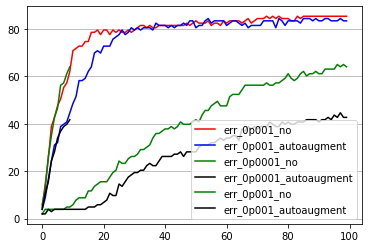

In [12]:
# AUGMENTATION, W NORMALIZATION, MOMENTUM =0.5

L2=[]
L2.append(["err_0p001_no",
[4.854369163513184, 14.563106536865234, 25.242717742919922, 38.83495330810547, 42.71844482421875, 47.57281494140625, 50.485435485839844, 55.339805603027344, 57.28155517578125, 62.135921478271484, 70.87378692626953, 71.84465789794922, 72.81553649902344, 72.81553649902344, 74.75727844238281, 74.75727844238281, 78.64077758789062, 78.64077758789062, 79.61164855957031, 77.66990661621094, 79.61164855957031, 79.61164855957031, 77.66990661621094, 79.61164855957031, 78.64077758789062, 79.61164855957031, 78.64077758789062, 78.64077758789062, 79.61164855957031, 78.64077758789062, 79.61164855957031, 80.58252716064453, 81.55339813232422, 81.55339813232422, 80.58252716064453, 81.55339813232422, 80.58252716064453, 80.58252716064453, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 81.55339813232422, 82.5242691040039, 83.49514770507812, 82.5242691040039, 82.5242691040039, 82.5242691040039, 83.49514770507812, 81.55339813232422, 82.5242691040039, 82.5242691040039, 81.55339813232422, 83.49514770507812, 82.5242691040039, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812, 82.5242691040039, 83.49514770507812, 84.46601867675781, 82.5242691040039, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 83.49514770507812, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375]
])


L2.append(["err_0p001_autoaugment",
[3.8834950923919678, 8.73786449432373, 16.504854202270508, 24.2718448638916, 31.067960739135742, 32.03883361816406, 38.83495330810547, 39.805824279785156, 40.77669906616211, 44.660194396972656, 48.5436897277832, 51.4563102722168, 58.25242614746094, 58.25242614746094, 59.22330093383789, 62.135921478271484, 64.07766723632812, 69.90291595458984, 70.87378692626953, 69.90291595458984, 72.81553649902344, 72.81553649902344, 72.81553649902344, 75.72815704345703, 76.69902801513672, 77.66990661621094, 79.61164855957031, 77.66990661621094, 78.64077758789062, 80.58252716064453, 79.61164855957031, 80.58252716064453, 79.61164855957031, 80.58252716064453, 80.58252716064453, 80.58252716064453, 79.61164855957031, 82.5242691040039, 81.55339813232422, 81.55339813232422, 81.55339813232422, 80.58252716064453, 81.55339813232422, 80.58252716064453, 81.55339813232422, 81.55339813232422, 82.5242691040039, 81.55339813232422, 83.49514770507812, 83.49514770507812, 80.58252716064453, 81.55339813232422, 81.55339813232422, 83.49514770507812, 84.46601867675781, 82.5242691040039, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812, 81.55339813232422, 82.5242691040039, 83.49514770507812, 83.49514770507812, 82.5242691040039, 81.55339813232422, 82.5242691040039, 80.58252716064453, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812, 80.58252716064453, 84.46601867675781, 83.49514770507812, 81.55339813232422, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812, 82.5242691040039, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 83.49514770507812, 83.49514770507812, 84.46601867675781, 84.46601867675781, 83.49514770507812, 83.49514770507812, 83.49514770507812, 84.46601867675781, 83.49514770507812, 83.49514770507812]
])

plt.grid(True, axis='y')

for e in L2:
    if e[0][-1]=='o':
        plt.plot(e[1], 'r',label=e[0])
    else:
        plt.plot(e[1], 'b',label=e[0])


for e in L:
    if e[0][-1]=='o':
        plt.plot(e[1], 'g',label=e[0])
    else:
        plt.plot(e[1], 'k',label=e[0])

plt.legend()




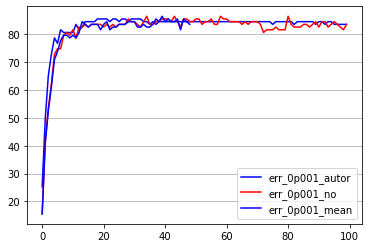

In [13]:
%matplotlib inline
#MOMENTUM 0.9
L3=[]
L3.append(["err_0p001_autor",
[25.242717742919922, 49.514564514160156, 65.04854583740234, 72.81553649902344, 78.64077758789062, 76.69902801513672, 81.55339813232422, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 83.49514770507812, 81.55339813232422, 82.5242691040039, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812]
])
L3.append(["err_0p001_no",
[15.533980369567871, 41.74757385253906, 53.3980598449707, 62.135921478271484, 72.81553649902344, 74.75727844238281, 74.75727844238281, 79.61164855957031, 80.58252716064453, 79.61164855957031, 81.55339813232422, 78.64077758789062, 82.5242691040039, 82.5242691040039, 83.49514770507812, 82.5242691040039, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812, 82.5242691040039, 83.49514770507812, 82.5242691040039, 83.49514770507812, 82.5242691040039, 83.49514770507812, 83.49514770507812, 83.49514770507812, 85.4368896484375, 84.46601867675781, 84.46601867675781, 83.49514770507812, 82.5242691040039, 84.46601867675781, 86.40776824951172, 83.49514770507812, 83.49514770507812, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 86.40776824951172, 84.46601867675781, 82.5242691040039, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 83.49514770507812, 84.46601867675781, 84.46601867675781, 85.4368896484375, 83.49514770507812, 83.49514770507812, 86.40776824951172, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 80.58252716064453, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 81.55339813232422, 81.55339813232422, 81.55339813232422, 86.40776824951172, 83.49514770507812, 82.5242691040039, 82.5242691040039, 82.5242691040039, 83.49514770507812, 83.49514770507812, 82.5242691040039, 83.49514770507812, 84.46601867675781, 82.5242691040039, 84.46601867675781, 84.46601867675781, 82.5242691040039, 83.49514770507812, 84.46601867675781, 83.49514770507812, 82.5242691040039, 81.55339813232422, 83.49514770507812]
])

#MOMENTUM 0.9 new mean
L3.append(["err_0p001_mean",
[15.533980369567871, 40.77669906616211, 52.42718505859375, 61.16504669189453, 70.87378692626953, 73.78640747070312, 77.66990661621094, 79.61164855957031, 79.61164855957031, 78.64077758789062, 79.61164855957031, 78.64077758789062, 80.58252716064453, 84.46601867675781, 83.49514770507812, 82.5242691040039, 83.49514770507812, 83.49514770507812, 83.49514770507812, 81.55339813232422, 83.49514770507812, 84.46601867675781, 81.55339813232422, 82.5242691040039, 82.5242691040039, 83.49514770507812, 83.49514770507812, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 82.5242691040039, 82.5242691040039, 83.49514770507812, 82.5242691040039, 82.5242691040039, 83.49514770507812, 85.4368896484375, 84.46601867675781, 86.40776824951172, 84.46601867675781, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 81.55339813232422, 85.4368896484375, 84.46601867675781, 83.49514770507812]
])
plt.grid(True, axis='y')

for e in L3:
    if e[0][-1]=='o':
        plt.plot(e[1], 'r',label=e[0])
    else:
        plt.plot(e[1], 'b',label=e[0])

plt.legend()

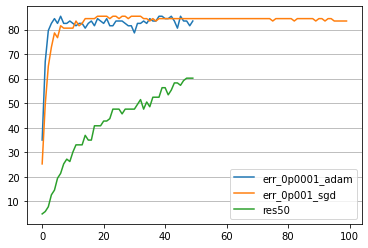

In [4]:
#ADAM 0.9


L4=[]
L4.append(["err_0p0001_adam",
[34.95145797729492, 66.99028778076172, 79.61164855957031, 82.5242691040039, 84.46601867675781, 82.5242691040039, 85.4368896484375, 82.5242691040039, 82.5242691040039, 83.49514770507812, 82.5242691040039, 81.55339813232422, 82.5242691040039, 82.5242691040039, 80.58252716064453, 82.5242691040039, 83.49514770507812, 81.55339813232422, 84.46601867675781, 83.49514770507812, 82.5242691040039, 84.46601867675781, 81.55339813232422, 81.55339813232422, 83.49514770507812, 83.49514770507812, 83.49514770507812, 82.5242691040039, 81.55339813232422, 81.55339813232422, 78.64077758789062, 82.5242691040039, 82.5242691040039, 83.49514770507812, 82.5242691040039, 84.46601867675781, 83.49514770507812, 83.49514770507812, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 83.49514770507812, 80.58252716064453, 85.4368896484375, 83.49514770507812, 83.49514770507812, 81.55339813232422, 83.49514770507812]
])
L4.append(["err_0p001_sgd",
[25.242717742919922, 49.514564514160156, 65.04854583740234, 72.81553649902344, 78.64077758789062, 76.69902801513672, 81.55339813232422, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 83.49514770507812, 81.55339813232422, 82.5242691040039, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812]
])
L4.append(["res50",
[4.854369163513184, 5.825242519378662, 7.7669901847839355, 12.621358871459961, 14.563106536865234, 19.417476654052734, 21.359222412109375, 25.242717742919922, 27.184465408325195, 26.213592529296875, 30.097087860107422, 33.009708404541016, 33.009708404541016, 33.009708404541016, 36.89320373535156, 34.95145797729492, 34.95145797729492, 40.77669906616211, 40.77669906616211, 40.77669906616211, 42.71844482421875, 42.71844482421875, 43.6893196105957, 47.57281494140625, 47.57281494140625, 47.57281494140625, 45.63106918334961, 47.57281494140625, 47.57281494140625, 47.57281494140625, 47.57281494140625, 49.514564514160156, 51.4563102722168, 47.57281494140625, 50.485435485839844, 48.5436897277832, 52.42718505859375, 52.42718505859375, 52.42718505859375, 56.3106803894043, 56.3106803894043, 53.3980598449707, 55.339805603027344, 58.25242614746094, 58.25242614746094, 57.28155517578125, 59.22330093383789, 60.194175720214844, 60.194175720214844, 60.194175720214844]])
plt.grid(True, axis='y')

for e in L4:
    plt.plot(e[1], label=e[0])
    


plt.legend()

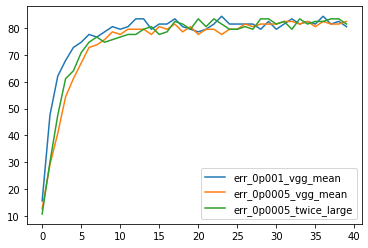

In [17]:
#VGG 0.9


L4=[]
# L4.append(["err_0p001_vgg",
# [19.417476654052734, 47.57281494140625, 56.3106803894043, 63.10679626464844, 74.75727844238281, 70.87378692626953, 78.64077758789062, 74.75727844238281, 76.69902801513672, 75.72815704345703, 75.72815704345703, 78.64077758789062, 78.64077758789062, 80.58252716064453, 77.66990661621094, 79.61164855957031, 78.64077758789062, 83.49514770507812, 79.61164855957031, 78.64077758789062, 79.61164855957031, 76.69902801513672, 77.66990661621094, 77.66990661621094, 76.69902801513672, 82.5242691040039, 79.61164855957031, 81.55339813232422, 81.55339813232422, 79.61164855957031, 78.64077758789062, 79.61164855957031, 80.58252716064453, 82.5242691040039, 79.61164855957031, 79.61164855957031, 77.66990661621094, 79.61164855957031, 81.55339813232422, 78.64077758789062]
# ])
L4.append(["err_0p001_vgg_mean",[15.533980369567871, 47.57281494140625, 62.135921478271484, 67.96116638183594, 72.81553649902344, 74.75727844238281, 77.66990661621094, 76.69902801513672, 78.64077758789062, 80.58252716064453, 79.61164855957031, 80.58252716064453, 83.49514770507812, 83.49514770507812, 79.61164855957031, 81.55339813232422, 81.55339813232422, 83.49514770507812, 80.58252716064453, 79.61164855957031, 78.64077758789062, 79.61164855957031, 81.55339813232422, 84.46601867675781, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 79.61164855957031, 82.5242691040039, 79.61164855957031, 81.55339813232422, 83.49514770507812, 81.55339813232422, 82.5242691040039, 81.55339813232422, 84.46601867675781, 81.55339813232422, 82.5242691040039, 80.58252716064453]
])
L4.append(["err_0p0005_vgg_mean",
[12.621358871459961, 29.12621307373047, 40.77669906616211, 54.36893081665039, 61.16504669189453, 66.99028778076172, 72.81553649902344, 73.78640747070312, 75.72815704345703, 78.64077758789062, 77.66990661621094, 79.61164855957031, 79.61164855957031, 79.61164855957031, 77.66990661621094, 80.58252716064453, 79.61164855957031, 81.55339813232422, 78.64077758789062, 80.58252716064453, 77.66990661621094, 79.61164855957031, 79.61164855957031, 77.66990661621094, 79.61164855957031, 79.61164855957031, 81.55339813232422, 80.58252716064453, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 82.5242691040039, 81.55339813232422, 82.5242691040039, 80.58252716064453, 82.5242691040039, 81.55339813232422, 81.55339813232422, 82.5242691040039]
])
L4.append(["err_0p0005_twice_large",
[10.679611206054688, 30.097087860107422, 47.57281494140625, 61.16504669189453, 64.07766723632812, 70.87378692626953, 74.75727844238281, 76.69902801513672, 74.75727844238281, 75.72815704345703, 76.69902801513672, 77.66990661621094, 77.66990661621094, 79.61164855957031, 80.58252716064453, 77.66990661621094, 78.64077758789062, 82.5242691040039, 81.55339813232422, 79.61164855957031, 83.49514770507812, 80.58252716064453, 83.49514770507812, 81.55339813232422, 79.61164855957031, 79.61164855957031, 80.58252716064453, 79.61164855957031, 83.49514770507812, 83.49514770507812, 81.55339813232422, 82.5242691040039, 79.61164855957031, 83.49514770507812, 81.55339813232422, 82.5242691040039, 82.5242691040039, 83.49514770507812, 83.49514770507812, 81.55339813232422]
])#

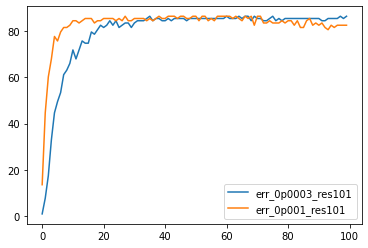

In [5]:
# RES 101 no batchnorm


L4=[]
# L4.append(["err_0p001_vgg",
# [19.417476654052734, 47.57281494140625, 56.3106803894043, 63.10679626464844, 74.75727844238281, 70.87378692626953, 78.64077758789062, 74.75727844238281, 76.69902801513672, 75.72815704345703, 75.72815704345703, 78.64077758789062, 78.64077758789062, 80.58252716064453, 77.66990661621094, 79.61164855957031, 78.64077758789062, 83.49514770507812, 79.61164855957031, 78.64077758789062, 79.61164855957031, 76.69902801513672, 77.66990661621094, 77.66990661621094, 76.69902801513672, 82.5242691040039, 79.61164855957031, 81.55339813232422, 81.55339813232422, 79.61164855957031, 78.64077758789062, 79.61164855957031, 80.58252716064453, 82.5242691040039, 79.61164855957031, 79.61164855957031, 77.66990661621094, 79.61164855957031, 81.55339813232422, 78.64077758789062]
# ])
L4.append(["err_0p0003_res101",[0.9708737730979919, 7.7669901847839355, 17.47572898864746, 33.009708404541016, 44.660194396972656, 49.514564514160156, 53.3980598449707, 61.16504669189453, 63.10679626464844, 66.01941680908203, 71.84465789794922, 67.96116638183594, 71.84465789794922, 75.72815704345703, 74.75727844238281, 74.75727844238281, 79.61164855957031, 78.64077758789062, 80.58252716064453, 82.5242691040039, 81.55339813232422, 82.5242691040039, 84.46601867675781, 82.5242691040039, 84.46601867675781, 81.55339813232422, 82.5242691040039, 83.49514770507812, 83.49514770507812, 81.55339813232422, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 86.40776824951172, 84.46601867675781, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 84.46601867675781, 86.40776824951172, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 86.40776824951172, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 86.40776824951172]])

L4.append(["err_0p001_res101",
[13.592232704162598, 44.660194396972656, 60.194175720214844, 67.96116638183594, 77.66990661621094, 75.72815704345703, 79.61164855957031, 81.55339813232422, 81.55339813232422, 82.5242691040039, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 83.49514770507812, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 84.46601867675781, 86.40776824951172, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 84.46601867675781, 86.40776824951172, 86.40776824951172, 84.46601867675781, 85.4368896484375, 84.46601867675781, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 85.4368896484375, 84.46601867675781, 86.40776824951172, 85.4368896484375, 86.40776824951172, 82.5242691040039, 86.40776824951172, 86.40776824951172, 83.49514770507812, 83.49514770507812, 84.46601867675781, 83.49514770507812, 83.49514770507812, 83.49514770507812, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 82.5242691040039, 84.46601867675781, 81.55339813232422, 81.55339813232422, 84.46601867675781, 85.4368896484375, 82.5242691040039, 83.49514770507812, 82.5242691040039, 83.49514770507812, 81.55339813232422, 80.58252716064453, 82.5242691040039, 81.55339813232422, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039]
])

for e in L4:
    plt.plot(e[1], label=e[0])
    


plt.legend()

## CROPPED BIRDS

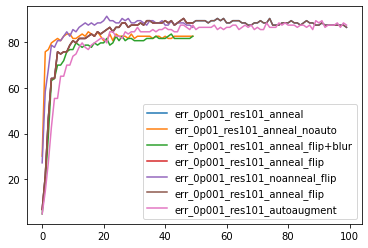

In [6]:
# RES 101 cropped birds
# %matplotlib qt

L4=[]

# L4.append(["err_0p0005_res101",[11.650485038757324, 30.097087860107422, 54.36893081665039, 64.07766723632812, 68.93203735351562, 73.78640747070312, 75.72815704345703, 76.69902801513672, 79.61164855957031, 78.64077758789062, 81.55339813232422, 79.61164855957031, 82.5242691040039, 82.5242691040039, 82.5242691040039, 81.55339813232422, 83.49514770507812, 83.49514770507812, 85.4368896484375, 84.46601867675781, 84.46601867675781, 84.46601867675781, 87.3786392211914, 85.4368896484375, 85.4368896484375, 86.40776824951172, 87.3786392211914, 88.34951782226562, 88.34951782226562, 87.3786392211914, 89.32038879394531, 87.3786392211914, 88.34951782226562, 87.3786392211914, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 89.32038879394531, 87.3786392211914, 88.34951782226562, 90.291259765625, 90.291259765625, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 89.32038879394531, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 87.3786392211914, 88.34951782226562, 86.40776824951172, 87.3786392211914, 87.3786392211914, 88.34951782226562, 88.34951782226562, 89.32038879394531, 87.3786392211914, 87.3786392211914, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 86.40776824951172]
# ])

# L4.append(["err_0p0001_res101",
# [2.912621259689331, 7.7669901847839355, 5.825242519378662, 11.650485038757324, 16.504854202270508, 22.330097198486328, 28.15534019470215, 33.009708404541016, 35.92232894897461, 43.6893196105957, 47.57281494140625, 50.485435485839844, 56.3106803894043, 58.25242614746094, 60.194175720214844, 63.10679626464844, 66.01941680908203, 66.99028778076172, 65.04854583740234, 69.90291595458984, 69.90291595458984, 70.87378692626953, 71.84465789794922, 71.84465789794922, 72.81553649902344, 75.72815704345703, 72.81553649902344, 73.78640747070312, 73.78640747070312, 73.78640747070312, 75.72815704345703, 77.66990661621094, 76.69902801513672, 77.66990661621094, 77.66990661621094, 78.64077758789062, 77.66990661621094, 79.61164855957031, 79.61164855957031, 78.64077758789062, 77.66990661621094, 79.61164855957031, 79.61164855957031, 79.61164855957031, 79.61164855957031, 79.61164855957031, 79.61164855957031, 79.61164855957031, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 81.55339813232422, 81.55339813232422, 82.5242691040039, 81.55339813232422, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 80.58252716064453, 81.55339813232422, 81.55339813232422, 82.5242691040039, 82.5242691040039, 83.49514770507812, 82.5242691040039, 83.49514770507812, 82.5242691040039, 83.49514770507812, 82.5242691040039, 85.4368896484375, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812, 83.49514770507812, 82.5242691040039, 82.5242691040039, 84.46601867675781, 82.5242691040039, 82.5242691040039, 83.49514770507812, 83.49514770507812, 84.46601867675781, 83.49514770507812, 82.5242691040039, 82.5242691040039, 84.46601867675781, 83.49514770507812, 83.49514770507812, 84.46601867675781, 83.49514770507812, 83.49514770507812]
# ])

L4.append(["err_0p001_res101_anneal",
[6.796116352081299, 21.359222412109375, 46.6019401550293, 64.07766723632812, 64.07766723632812, 75.72815704345703, 74.75727844238281, 75.72815704345703, 75.72815704345703, 78.64077758789062, 80.58252716064453, 79.61164855957031, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 83.49514770507812, 82.5242691040039, 84.46601867675781, 83.49514770507812, 84.46601867675781, 85.4368896484375, 86.40776824951172, 84.46601867675781, 86.40776824951172, 86.40776824951172, 88.34951782226562, 88.34951782226562, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 89.32038879394531, 87.3786392211914, 88.34951782226562, 89.32038879394531, 90.291259765625, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 89.32038879394531, 89.32038879394531, 90.291259765625, 89.32038879394531, 90.291259765625, 88.34951782226562, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 87.3786392211914, 87.3786392211914, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 90.291259765625, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 87.3786392211914, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172]
])
# L4.append(["err_0p001_res101_anneal_noauto",
# [6.796116352081299, 21.359222412109375, 46.6019401550293, 65.04854583740234, 66.99028778076172, 76.69902801513672, 73.78640747070312, 76.69902801513672, 75.72815704345703, 77.66990661621094, 81.55339813232422, 80.58252716064453, 81.55339813232422, 81.55339813232422, 83.49514770507812, 81.55339813232422, 83.49514770507812, 83.49514770507812, 84.46601867675781, 83.49514770507812, 86.40776824951172, 86.40776824951172, 85.4368896484375, 84.46601867675781, 87.3786392211914, 86.40776824951172, 88.34951782226562, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 89.32038879394531, 88.34951782226562, 89.32038879394531, 88.34951782226562, 89.32038879394531, 89.32038879394531, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 89.32038879394531, 88.34951782226562, 89.32038879394531, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914]
# ])

L4.append(["err_0p01_res101_anneal_noauto",
[30.097087860107422, 75.72815704345703, 76.69902801513672, 79.61164855957031, 80.58252716064453, 81.55339813232422, 80.58252716064453, 82.5242691040039, 83.49514770507812, 83.49514770507812, 81.55339813232422, 81.55339813232422, 82.5242691040039, 83.49514770507812, 82.5242691040039, 84.46601867675781, 83.49514770507812, 82.5242691040039, 84.46601867675781, 82.5242691040039, 80.58252716064453, 80.58252716064453, 83.49514770507812, 80.58252716064453, 83.49514770507812, 82.5242691040039, 82.5242691040039, 82.5242691040039, 81.55339813232422, 83.49514770507812, 81.55339813232422, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 81.55339813232422, 82.5242691040039, 82.5242691040039, 81.55339813232422, 82.5242691040039, 81.55339813232422, 81.55339813232422, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039]
])
L4.append(["err_0p001_res101_anneal_flip+blur",
[4.854369163513184, 18.44660186767578, 38.83495330810547, 63.10679626464844, 64.07766723632812, 69.90291595458984, 69.90291595458984, 71.84465789794922, 75.72815704345703, 76.69902801513672, 76.69902801513672, 79.61164855957031, 78.64077758789062, 77.66990661621094, 78.64077758789062, 78.64077758789062, 77.66990661621094, 79.61164855957031, 78.64077758789062, 79.61164855957031, 79.61164855957031, 81.55339813232422, 78.64077758789062, 79.61164855957031, 82.5242691040039, 80.58252716064453, 82.5242691040039, 80.58252716064453, 81.55339813232422, 81.55339813232422, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 83.49514770507812, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039]
])

L4.append(["err_0p001_res101_anneal_flip",
[6.796116352081299, 21.359222412109375, 46.6019401550293, 64.07766723632812, 64.07766723632812, 75.72815704345703, 74.75727844238281, 75.72815704345703, 75.72815704345703, 78.64077758789062, 80.58252716064453, 79.61164855957031, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 83.49514770507812, 82.5242691040039, 84.46601867675781, 83.49514770507812, 84.46601867675781, 85.4368896484375, 86.40776824951172, 84.46601867675781, 86.40776824951172, 86.40776824951172, 88.34951782226562, 88.34951782226562, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 89.32038879394531, 87.3786392211914, 88.34951782226562, 89.32038879394531, 90.291259765625, 88.34951782226562, 88.34951782226562, 88.34951782226562]
])
L4.append(["err_0p001_res101_noanneal_flip",
[27.184465408325195, 58.25242614746094, 67.96116638183594, 78.64077758789062, 77.66990661621094, 80.58252716064453, 80.58252716064453, 82.5242691040039, 84.46601867675781, 82.5242691040039, 85.4368896484375, 84.46601867675781, 86.40776824951172, 87.3786392211914, 88.34951782226562, 87.3786392211914, 88.34951782226562, 87.3786392211914, 88.34951782226562, 88.34951782226562, 89.32038879394531, 91.26213836669922, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 90.291259765625, 89.32038879394531, 90.291259765625, 88.34951782226562, 88.34951782226562, 89.32038879394531, 89.32038879394531, 88.34951782226562, 87.3786392211914, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 89.32038879394531, 87.3786392211914, 87.3786392211914, 89.32038879394531, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 87.3786392211914, 86.40776824951172]
])

L4.append(["err_0p001_res101_anneal_flip",
[6.796116352081299, 21.359222412109375, 46.6019401550293, 64.07766723632812, 64.07766723632812, 75.72815704345703, 74.75727844238281, 75.72815704345703, 75.72815704345703, 78.64077758789062, 80.58252716064453, 79.61164855957031, 81.55339813232422, 81.55339813232422, 81.55339813232422, 82.5242691040039, 83.49514770507812, 82.5242691040039, 84.46601867675781, 83.49514770507812, 84.46601867675781, 85.4368896484375, 86.40776824951172, 84.46601867675781, 86.40776824951172, 86.40776824951172, 88.34951782226562, 88.34951782226562, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 89.32038879394531, 87.3786392211914, 88.34951782226562, 89.32038879394531, 90.291259765625, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 89.32038879394531, 89.32038879394531, 90.291259765625, 89.32038879394531, 90.291259765625, 88.34951782226562, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 87.3786392211914, 87.3786392211914, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 90.291259765625, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 87.3786392211914, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172]])


L4.append(["err_0p001_res101_autoaugment",
[4.854369163513184, 14.563106536865234, 27.184465408325195, 42.71844482421875, 55.339805603027344, 55.339805603027344, 65.04854583740234, 65.04854583740234, 69.90291595458984, 69.90291595458984, 73.78640747070312, 74.75727844238281, 77.66990661621094, 79.61164855957031, 77.66990661621094, 76.69902801513672, 78.64077758789062, 79.61164855957031, 80.58252716064453, 81.55339813232422, 81.55339813232422, 79.61164855957031, 84.46601867675781, 84.46601867675781, 82.5242691040039, 82.5242691040039, 81.55339813232422, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 86.40776824951172, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 87.3786392211914, 87.3786392211914, 86.40776824951172, 85.4368896484375, 87.3786392211914, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 85.4368896484375, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 87.3786392211914, 87.3786392211914, 85.4368896484375, 86.40776824951172, 87.3786392211914, 86.40776824951172, 87.3786392211914, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 88.34951782226562, 86.40776824951172, 86.40776824951172, 86.40776824951172, 88.34951782226562, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 85.4368896484375, 89.32038879394531, 88.34951782226562, 89.32038879394531, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 86.40776824951172, 88.34951782226562, 87.3786392211914]
])
for e in L4:
    plt.plot(e[1], label=e[0])
    


plt.legend()

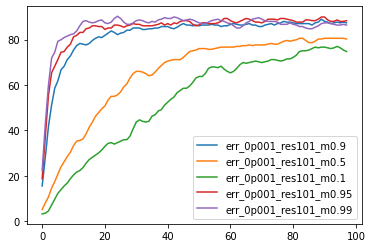

In [7]:
# MOMENT, autoaugment

L4 =[]
L4.append(["err_0p001_res101_m0.9",
[4.854369163513184, 14.563106536865234, 27.184465408325195, 42.71844482421875, 55.339805603027344, 55.339805603027344, 65.04854583740234, 65.04854583740234, 69.90291595458984, 69.90291595458984, 73.78640747070312, 74.75727844238281, 77.66990661621094, 79.61164855957031, 77.66990661621094, 76.69902801513672, 78.64077758789062, 79.61164855957031, 80.58252716064453, 81.55339813232422, 81.55339813232422, 79.61164855957031, 84.46601867675781, 84.46601867675781, 82.5242691040039, 82.5242691040039, 81.55339813232422, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 86.40776824951172, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 87.3786392211914, 87.3786392211914, 86.40776824951172, 85.4368896484375, 87.3786392211914, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 85.4368896484375, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 87.3786392211914, 87.3786392211914, 85.4368896484375, 86.40776824951172, 87.3786392211914, 86.40776824951172, 87.3786392211914, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 88.34951782226562, 86.40776824951172, 86.40776824951172, 86.40776824951172, 88.34951782226562, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 85.4368896484375, 89.32038879394531, 88.34951782226562, 89.32038879394531, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 86.40776824951172, 88.34951782226562, 87.3786392211914]
])
L4.append(["err_0p001_res101_m0.5",
[3.8834950923919678, 4.854369163513184, 6.796116352081299, 12.621358871459961, 12.621358871459961, 18.44660186767578, 21.359222412109375, 22.330097198486328, 28.15534019470215, 28.15534019470215, 29.12621307373047, 33.98058319091797, 36.89320373535156, 34.95145797729492, 34.95145797729492, 38.83495330810547, 41.74757385253906, 43.6893196105957, 45.63106918334961, 49.514564514160156, 48.5436897277832, 50.485435485839844, 53.3980598449707, 56.3106803894043, 55.339805603027344, 53.3980598449707, 58.25242614746094, 59.22330093383789, 60.194175720214844, 62.135921478271484, 66.99028778076172, 66.01941680908203, 65.04854583740234, 66.99028778076172, 65.04854583740234, 63.10679626464844, 64.07766723632812, 66.01941680908203, 66.99028778076172, 68.93203735351562, 69.90291595458984, 70.87378692626953, 70.87378692626953, 70.87378692626953, 71.84465789794922, 70.87378692626953, 70.87378692626953, 74.75727844238281, 74.75727844238281, 74.75727844238281, 75.72815704345703, 75.72815704345703, 76.69902801513672, 75.72815704345703, 75.72815704345703, 75.72815704345703, 75.72815704345703, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 77.66990661621094, 76.69902801513672, 77.66990661621094, 77.66990661621094, 77.66990661621094, 76.69902801513672, 78.64077758789062, 77.66990661621094, 76.69902801513672, 78.64077758789062, 78.64077758789062, 77.66990661621094, 77.66990661621094, 78.64077758789062, 79.61164855957031, 79.61164855957031, 79.61164855957031, 78.64077758789062, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 77.66990661621094, 77.66990661621094, 80.58252716064453, 79.61164855957031, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 79.61164855957031]
])

L4.append(["err_0p001_res101_m0.1",
[3.8834950923919678, 2.912621259689331, 2.912621259689331, 4.854369163513184, 5.825242519378662, 10.679611206054688, 12.621358871459961, 13.592232704162598, 15.533980369567871, 17.47572898864746, 17.47572898864746, 21.359222412109375, 22.330097198486328, 21.359222412109375, 23.30097007751465, 26.213592529296875, 27.184465408325195, 28.15534019470215, 29.12621307373047, 30.097087860107422, 31.067960739135742, 33.009708404541016, 34.95145797729492, 34.95145797729492, 33.98058319091797, 33.009708404541016, 36.89320373535156, 35.92232894897461, 34.95145797729492, 36.89320373535156, 40.77669906616211, 44.660194396972656, 45.63106918334961, 43.6893196105957, 42.71844482421875, 44.660194396972656, 44.660194396972656, 49.514564514160156, 46.6019401550293, 49.514564514160156, 51.4563102722168, 52.42718505859375, 53.3980598449707, 55.339805603027344, 55.339805603027344, 59.22330093383789, 58.25242614746094, 58.25242614746094, 59.22330093383789, 61.16504669189453, 63.10679626464844, 65.04854583740234, 63.10679626464844, 63.10679626464844, 68.93203735351562, 69.90291595458984, 65.04854583740234, 68.93203735351562, 68.93203735351562, 66.99028778076172, 65.04854583740234, 66.01941680908203, 65.04854583740234, 66.99028778076172, 69.90291595458984, 69.90291595458984, 69.90291595458984, 68.93203735351562, 70.87378692626953, 70.87378692626953, 69.90291595458984, 69.90291595458984, 69.90291595458984, 70.87378692626953, 70.87378692626953, 71.84465789794922, 70.87378692626953, 69.90291595458984, 70.87378692626953, 71.84465789794922, 71.84465789794922, 70.87378692626953, 73.78640747070312, 74.75727844238281, 75.72815704345703, 74.75727844238281, 74.75727844238281, 76.69902801513672, 76.69902801513672, 76.69902801513672, 75.72815704345703, 77.66990661621094, 76.69902801513672, 74.75727844238281, 76.69902801513672, 77.66990661621094, 76.69902801513672, 74.75727844238281, 74.75727844238281, 74.75727844238281]
])
L4.append(["err_0p001_res101_m0.95",

[8.73786449432373, 11.650485038757324, 35.92232894897461, 64.07766723632812, 66.01941680908203, 66.01941680908203, 72.81553649902344, 74.75727844238281, 75.72815704345703, 73.78640747070312, 80.58252716064453, 79.61164855957031, 83.49514770507812, 82.5242691040039, 83.49514770507812, 83.49514770507812, 87.3786392211914, 84.46601867675781, 86.40776824951172, 87.3786392211914, 83.49514770507812, 86.40776824951172, 83.49514770507812, 85.4368896484375, 86.40776824951172, 87.3786392211914, 85.4368896484375, 85.4368896484375, 85.4368896484375, 87.3786392211914, 86.40776824951172, 87.3786392211914, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 85.4368896484375, 87.3786392211914, 87.3786392211914, 87.3786392211914, 84.46601867675781, 89.32038879394531, 85.4368896484375, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 84.46601867675781, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 88.34951782226562, 89.32038879394531, 90.291259765625, 88.34951782226562, 86.40776824951172, 88.34951782226562, 87.3786392211914, 88.34951782226562, 90.291259765625, 89.32038879394531, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 89.32038879394531, 90.291259765625, 87.3786392211914, 89.32038879394531, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 86.40776824951172, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 87.3786392211914, 89.32038879394531, 90.291259765625, 90.291259765625, 89.32038879394531, 86.40776824951172, 88.34951782226562, 89.32038879394531, 88.34951782226562, 86.40776824951172, 89.32038879394531, 89.32038879394531]
])
L4.append(["err_0p001_res101_m0.99",
[9.708738327026367, 15.533980369567871, 41.74757385253906, 70.87378692626953, 66.99028778076172, 77.66990661621094, 78.64077758789062, 81.55339813232422, 79.61164855957031, 81.55339813232422, 83.49514770507812, 81.55339813232422, 82.5242691040039, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 86.40776824951172, 87.3786392211914, 89.32038879394531, 88.34951782226562, 88.34951782226562, 85.4368896484375, 87.3786392211914, 90.291259765625, 90.291259765625, 90.291259765625, 87.3786392211914, 85.4368896484375, 87.3786392211914, 87.3786392211914, 87.3786392211914, 90.291259765625, 88.34951782226562, 86.40776824951172, 88.34951782226562, 87.3786392211914, 88.34951782226562, 87.3786392211914, 90.291259765625, 89.32038879394531, 89.32038879394531, 89.32038879394531, 89.32038879394531, 91.26213836669922, 88.34951782226562, 87.3786392211914, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 88.34951782226562, 89.32038879394531, 88.34951782226562, 89.32038879394531, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 84.46601867675781, 84.46601867675781, 86.40776824951172, 87.3786392211914, 88.34951782226562, 88.34951782226562, 90.291259765625, 89.32038879394531, 89.32038879394531, 88.34951782226562, 87.3786392211914, 88.34951782226562, 88.34951782226562, 87.3786392211914, 87.3786392211914, 85.4368896484375, 87.3786392211914, 87.3786392211914, 87.3786392211914, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 86.40776824951172, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172, 87.3786392211914, 86.40776824951172, 85.4368896484375, 87.3786392211914, 87.3786392211914, 84.46601867675781]
])
for e in L4:
    plt.plot(sliding_mean(e[1],3), label=e[0])
plt.legend()



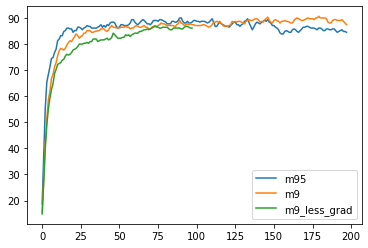

In [9]:
# MOMENT, autoaugment, 200epoch
%matplotlib inline
L4 = []
L4.append(["m95",
[8.73786449432373, 11.650485038757324, 35.92232894897461, 64.07766723632812, 66.01941680908203, 66.01941680908203, 72.81553649902344, 74.75727844238281, 75.72815704345703, 73.78640747070312, 80.58252716064453, 79.61164855957031, 83.49514770507812, 82.5242691040039, 83.49514770507812, 83.49514770507812, 87.3786392211914, 84.46601867675781, 86.40776824951172, 87.3786392211914, 83.49514770507812, 86.40776824951172, 83.49514770507812, 85.4368896484375, 86.40776824951172, 87.3786392211914, 85.4368896484375, 85.4368896484375, 85.4368896484375, 87.3786392211914, 86.40776824951172, 87.3786392211914, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 85.4368896484375, 87.3786392211914, 87.3786392211914, 87.3786392211914, 84.46601867675781, 89.32038879394531, 85.4368896484375, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 84.46601867675781, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 88.34951782226562, 89.32038879394531, 90.291259765625, 88.34951782226562, 86.40776824951172, 88.34951782226562, 87.3786392211914, 88.34951782226562, 90.291259765625, 89.32038879394531, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 89.32038879394531, 90.291259765625, 87.3786392211914, 89.32038879394531, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 86.40776824951172, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 87.3786392211914, 89.32038879394531, 90.291259765625, 90.291259765625, 89.32038879394531, 86.40776824951172, 88.34951782226562, 89.32038879394531, 88.34951782226562, 86.40776824951172, 89.32038879394531, 89.32038879394531, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 89.32038879394531, 90.291259765625, 89.32038879394531, 85.4368896484375, 85.4368896484375, 89.32038879394531, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 86.40776824951172, 87.3786392211914, 85.4368896484375, 88.34951782226562, 89.32038879394531, 87.3786392211914, 88.34951782226562, 86.40776824951172, 87.3786392211914, 86.40776824951172, 88.34951782226562, 88.34951782226562, 89.32038879394531, 89.32038879394531, 90.291259765625, 84.46601867675781, 85.4368896484375, 86.40776824951172, 87.3786392211914, 89.32038879394531, 88.34951782226562, 86.40776824951172, 88.34951782226562, 90.291259765625, 87.3786392211914, 89.32038879394531, 89.32038879394531, 89.32038879394531, 86.40776824951172, 88.34951782226562, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 84.46601867675781, 82.5242691040039, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 83.49514770507812, 84.46601867675781, 85.4368896484375, 86.40776824951172, 85.4368896484375, 84.46601867675781, 84.46601867675781, 84.46601867675781, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 85.4368896484375, 85.4368896484375, 85.4368896484375, 87.3786392211914, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 84.46601867675781, 86.40776824951172, 86.40776824951172, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 83.49514770507812, 85.4368896484375, 84.46601867675781]
])

L4.append(["m9",

[4.854369163513184, 14.563106536865234, 27.184465408325195, 42.71844482421875, 55.339805603027344, 55.339805603027344, 65.04854583740234, 65.04854583740234, 69.90291595458984, 69.90291595458984, 73.78640747070312, 74.75727844238281, 77.66990661621094, 79.61164855957031, 77.66990661621094, 76.69902801513672, 78.64077758789062, 79.61164855957031, 80.58252716064453, 81.55339813232422, 81.55339813232422, 79.61164855957031, 84.46601867675781, 84.46601867675781, 82.5242691040039, 82.5242691040039, 81.55339813232422, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 86.40776824951172, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 87.3786392211914, 87.3786392211914, 86.40776824951172, 85.4368896484375, 87.3786392211914, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 85.4368896484375, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 87.3786392211914, 87.3786392211914, 85.4368896484375, 86.40776824951172, 87.3786392211914, 86.40776824951172, 87.3786392211914, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 88.34951782226562, 86.40776824951172, 86.40776824951172, 86.40776824951172, 88.34951782226562, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 85.4368896484375, 89.32038879394531, 88.34951782226562, 89.32038879394531, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 88.34951782226562, 89.32038879394531, 87.3786392211914, 89.32038879394531, 88.34951782226562, 88.34951782226562, 86.40776824951172, 86.40776824951172, 87.3786392211914, 87.3786392211914, 85.4368896484375, 88.34951782226562, 88.34951782226562, 89.32038879394531, 87.3786392211914, 89.32038879394531, 88.34951782226562, 88.34951782226562, 89.32038879394531, 87.3786392211914, 87.3786392211914, 88.34951782226562, 90.291259765625, 88.34951782226562, 89.32038879394531, 89.32038879394531, 88.34951782226562, 90.291259765625, 90.291259765625, 88.34951782226562, 89.32038879394531, 87.3786392211914, 89.32038879394531, 88.34951782226562, 90.291259765625, 90.291259765625, 90.291259765625, 86.40776824951172, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 88.34951782226562, 87.3786392211914, 90.291259765625, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 87.3786392211914, 88.34951782226562, 88.34951782226562, 90.291259765625, 90.291259765625, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 89.32038879394531, 90.291259765625, 89.32038879394531, 90.291259765625, 89.32038879394531, 89.32038879394531, 90.291259765625, 88.34951782226562, 91.26213836669922, 90.291259765625, 90.291259765625, 89.32038879394531, 90.291259765625, 90.291259765625, 89.32038879394531, 89.32038879394531, 86.40776824951172, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 89.32038879394531, 88.34951782226562, 89.32038879394531, 89.32038879394531, 89.32038879394531, 87.3786392211914, 87.3786392211914, 87.3786392211914]
])

L4.append(["m9_less_grad",
[4.854369163513184, 10.679611206054688, 29.12621307373047, 40.77669906616211, 49.514564514160156, 56.3106803894043, 59.22330093383789, 62.135921478271484, 66.01941680908203, 66.01941680908203, 73.78640747070312, 70.87378692626953, 71.84465789794922, 74.75727844238281, 71.84465789794922, 74.75727844238281, 75.72815704345703, 75.72815704345703, 76.69902801513672, 74.75727844238281, 76.69902801513672, 78.64077758789062, 77.66990661621094, 77.66990661621094, 79.61164855957031, 79.61164855957031, 80.58252716064453, 79.61164855957031, 79.61164855957031, 81.55339813232422, 79.61164855957031, 80.58252716064453, 80.58252716064453, 81.55339813232422, 80.58252716064453, 83.49514770507812, 81.55339813232422, 80.58252716064453, 80.58252716064453, 82.5242691040039, 81.55339813232422, 80.58252716064453, 82.5242691040039, 82.5242691040039, 81.55339813232422, 80.58252716064453, 83.49514770507812, 83.49514770507812, 85.4368896484375, 81.55339813232422, 81.55339813232422, 83.49514770507812, 81.55339813232422, 81.55339813232422, 84.46601867675781, 81.55339813232422, 84.46601867675781, 83.49514770507812, 82.5242691040039, 82.5242691040039, 85.4368896484375, 83.49514770507812, 83.49514770507812, 85.4368896484375, 83.49514770507812, 85.4368896484375, 85.4368896484375, 84.46601867675781, 86.40776824951172, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 84.46601867675781, 85.4368896484375, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 85.4368896484375, 85.4368896484375, 86.40776824951172, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172]])
for e in L4:
    # plt.plot(e[1], label=e[0])
    plt.plot(sliding_mean(e[1],3), label=e[0])
plt.legend()

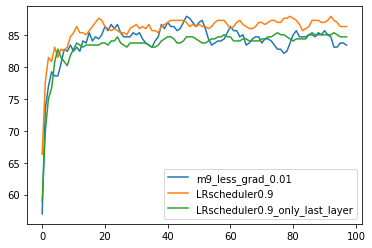

In [10]:
# MOMENT, autoaugment, 100epoch, ONLY TRAIN LAST CONV
L4 = []


L4.append(["m9_less_grad_0.01",
[30.097087860107422, 71.84465789794922, 68.93203735351562, 79.61164855957031, 82.5242691040039, 75.72815704345703, 77.66990661621094, 82.5242691040039, 81.55339813232422, 84.46601867675781, 81.55339813232422, 84.46601867675781, 81.55339813232422, 83.49514770507812, 82.5242691040039, 86.40776824951172, 82.5242691040039, 87.3786392211914, 82.5242691040039, 84.46601867675781, 86.40776824951172, 84.46601867675781, 88.34951782226562, 84.46601867675781, 87.3786392211914, 86.40776824951172, 86.40776824951172, 83.49514770507812, 84.46601867675781, 86.40776824951172, 83.49514770507812, 86.40776824951172, 85.4368896484375, 84.46601867675781, 83.49514770507812, 83.49514770507812, 83.49514770507812, 82.5242691040039, 86.40776824951172, 85.4368896484375, 88.34951782226562, 84.46601867675781, 88.34951782226562, 86.40776824951172, 84.46601867675781, 86.40776824951172, 87.3786392211914, 87.3786392211914, 89.32038879394531, 86.40776824951172, 85.4368896484375, 87.3786392211914, 88.34951782226562, 86.40776824951172, 83.49514770507812, 83.49514770507812, 83.49514770507812, 84.46601867675781, 84.46601867675781, 83.49514770507812, 85.4368896484375, 87.3786392211914, 86.40776824951172, 83.49514770507812, 87.3786392211914, 83.49514770507812, 84.46601867675781, 82.5242691040039, 84.46601867675781, 86.40776824951172, 83.49514770507812, 84.46601867675781, 83.49514770507812, 85.4368896484375, 84.46601867675781, 82.5242691040039, 83.49514770507812, 82.5242691040039, 82.5242691040039, 81.55339813232422, 83.49514770507812, 86.40776824951172, 85.4368896484375, 85.4368896484375, 83.49514770507812, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 84.46601867675781, 86.40776824951172, 84.46601867675781, 86.40776824951172, 84.46601867675781, 83.49514770507812, 81.55339813232422, 84.46601867675781, 85.4368896484375, 81.55339813232422, 83.49514770507812]
])

L4.append(["LRscheduler0.9",
[43.6893196105957, 74.75727844238281, 80.58252716064453, 77.66990661621094, 86.40776824951172, 78.64077758789062, 84.46601867675781, 81.55339813232422, 82.5242691040039, 83.49514770507812, 83.49514770507812, 87.3786392211914, 85.4368896484375, 86.40776824951172, 84.46601867675781, 85.4368896484375, 85.4368896484375, 86.40776824951172, 87.3786392211914, 87.3786392211914, 88.34951782226562, 86.40776824951172, 84.46601867675781, 87.3786392211914, 85.4368896484375, 85.4368896484375, 86.40776824951172, 84.46601867675781, 85.4368896484375, 85.4368896484375, 87.3786392211914, 86.40776824951172, 86.40776824951172, 85.4368896484375, 87.3786392211914, 85.4368896484375, 87.3786392211914, 84.46601867675781, 85.4368896484375, 86.40776824951172, 87.3786392211914, 86.40776824951172, 87.3786392211914, 88.34951782226562, 86.40776824951172, 87.3786392211914, 88.34951782226562, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 85.4368896484375, 87.3786392211914, 86.40776824951172, 85.4368896484375, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 85.4368896484375, 85.4368896484375, 88.34951782226562, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 88.34951782226562, 87.3786392211914, 86.40776824951172, 86.40776824951172, 84.46601867675781, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 88.34951782226562, 88.34951782226562, 85.4368896484375, 87.3786392211914, 86.40776824951172, 85.4368896484375, 87.3786392211914]
])

L4.append(["LRscheduler0.9_only_last_layer",

[36.89320373535156, 61.16504669189453, 78.64077758789062, 69.90291595458984, 76.69902801513672, 83.49514770507812, 82.5242691040039, 82.5242691040039, 79.61164855957031, 80.58252716064453, 80.58252716064453, 84.46601867675781, 83.49514770507812, 83.49514770507812, 83.49514770507812, 82.5242691040039, 84.46601867675781, 83.49514770507812, 82.5242691040039, 84.46601867675781, 83.49514770507812, 83.49514770507812, 84.46601867675781, 82.5242691040039, 85.4368896484375, 84.46601867675781, 84.46601867675781, 82.5242691040039, 83.49514770507812, 83.49514770507812, 84.46601867675781, 83.49514770507812, 83.49514770507812, 84.46601867675781, 83.49514770507812, 83.49514770507812, 83.49514770507812, 82.5242691040039, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 84.46601867675781, 83.49514770507812, 83.49514770507812, 84.46601867675781, 84.46601867675781, 85.4368896484375, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 83.49514770507812, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 84.46601867675781, 83.49514770507812, 84.46601867675781, 85.4368896484375, 83.49514770507812, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 84.46601867675781]
])
for e in L4:
     # plt.plot(e[1], label=e[0])
    plt.plot(sliding_mean(e[1],3), label=e[0])
plt.legend()

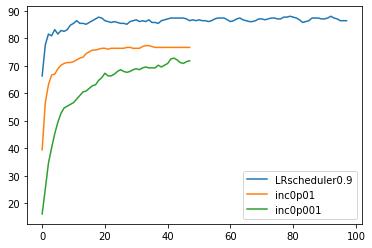

In [13]:
# inception net 

L5 = []


L5.append(["LRscheduler0.9",
[43.6893196105957, 74.75727844238281, 80.58252716064453, 77.66990661621094, 86.40776824951172, 78.64077758789062, 84.46601867675781, 81.55339813232422, 82.5242691040039, 83.49514770507812, 83.49514770507812, 87.3786392211914, 85.4368896484375, 86.40776824951172, 84.46601867675781, 85.4368896484375, 85.4368896484375, 86.40776824951172, 87.3786392211914, 87.3786392211914, 88.34951782226562, 86.40776824951172, 84.46601867675781, 87.3786392211914, 85.4368896484375, 85.4368896484375, 86.40776824951172, 84.46601867675781, 85.4368896484375, 85.4368896484375, 87.3786392211914, 86.40776824951172, 86.40776824951172, 85.4368896484375, 87.3786392211914, 85.4368896484375, 87.3786392211914, 84.46601867675781, 85.4368896484375, 86.40776824951172, 87.3786392211914, 86.40776824951172, 87.3786392211914, 88.34951782226562, 86.40776824951172, 87.3786392211914, 88.34951782226562, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 85.4368896484375, 87.3786392211914, 86.40776824951172, 85.4368896484375, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 85.4368896484375, 85.4368896484375, 88.34951782226562, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 88.34951782226562, 87.3786392211914, 86.40776824951172, 86.40776824951172, 84.46601867675781, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 88.34951782226562, 88.34951782226562, 85.4368896484375, 87.3786392211914, 86.40776824951172, 85.4368896484375, 87.3786392211914]
])

L5.append(["inc0p01",
[16.504854202270508, 44.660194396972656, 57.28155517578125, 67.96116638183594, 64.07766723632812, 67.96116638183594, 68.93203735351562, 69.90291595458984, 71.84465789794922, 70.87378692626953, 70.87378692626953, 71.84465789794922, 71.84465789794922, 72.81553649902344, 73.78640747070312, 72.81553649902344, 76.69902801513672, 75.72815704345703, 74.75727844238281, 76.69902801513672, 76.69902801513672, 75.72815704345703, 76.69902801513672, 75.72815704345703, 76.69902801513672, 76.69902801513672, 75.72815704345703, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 75.72815704345703, 76.69902801513672, 76.69902801513672, 77.66990661621094, 77.66990661621094, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672, 76.69902801513672]
])

L5.append(["inc0p001",

[6.796116352081299, 13.592232704162598, 28.15534019470215, 33.98058319091797, 41.74757385253906, 44.660194396972656, 49.514564514160156, 54.36893081665039, 54.36893081665039, 55.339805603027344, 56.3106803894043, 56.3106803894043, 57.28155517578125, 60.194175720214844, 60.194175720214844, 61.16504669189453, 61.16504669189453, 63.10679626464844, 64.07766723632812, 62.135921478271484, 67.96116638183594, 66.99028778076172, 66.99028778076172, 65.04854583740234, 66.99028778076172, 68.93203735351562, 67.96116638183594, 68.93203735351562, 66.99028778076172, 66.99028778076172, 69.90291595458984, 68.93203735351562, 67.96116638183594, 68.93203735351562, 70.87378692626953, 68.93203735351562, 67.96116638183594, 70.87378692626953, 68.93203735351562, 70.87378692626953, 68.93203735351562, 70.87378692626953, 72.81553649902344, 73.78640747070312, 71.84465789794922, 70.87378692626953, 70.87378692626953, 70.87378692626953, 72.81553649902344, 71.84465789794922]
])
for e in L5:
     # plt.plot(e[1], label=e[0])
    plt.plot(sliding_mean(e[1],3), label=e[0])
plt.legend()


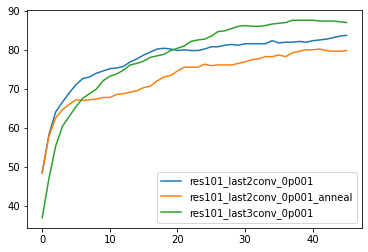

In [19]:

# Conv 

L5 = []


L5.append(["res101_last2conv_0p001",

[19.417476654052734, 43.6893196105957, 56.3106803894043, 61.16504669189453, 62.135921478271484, 67.96116638183594, 72.81553649902344, 68.93203735351562, 72.81553649902344, 72.81553649902344, 75.72815704345703, 74.75727844238281, 73.78640747070312, 75.72815704345703, 75.72815704345703, 76.69902801513672, 76.69902801513672, 79.61164855957031, 79.61164855957031, 80.58252716064453, 80.58252716064453, 80.58252716064453, 80.58252716064453, 78.64077758789062, 78.64077758789062, 81.55339813232422, 79.61164855957031, 80.58252716064453, 80.58252716064453, 81.55339813232422, 81.55339813232422, 81.55339813232422, 81.55339813232422, 79.61164855957031, 83.49514770507812, 81.55339813232422, 81.55339813232422, 81.55339813232422, 83.49514770507812, 80.58252716064453, 82.5242691040039, 81.55339813232422, 82.5242691040039, 82.5242691040039, 82.5242691040039, 83.49514770507812, 82.5242691040039, 84.46601867675781, 84.46601867675781, 83.49514770507812]
])

L5.append(["res101_last2conv_0p001_anneal",
[19.417476654052734, 43.6893196105957, 56.3106803894043, 60.194175720214844, 62.135921478271484, 66.99028778076172, 66.99028778076172, 66.99028778076172, 66.99028778076172, 67.96116638183594, 66.01941680908203, 67.96116638183594, 67.96116638183594, 68.93203735351562, 67.96116638183594, 69.90291595458984, 68.93203735351562, 69.90291595458984, 70.87378692626953, 71.84465789794922, 71.84465789794922, 75.72815704345703, 74.75727844238281, 72.81553649902344, 77.66990661621094, 76.69902801513672, 75.72815704345703, 74.75727844238281, 76.69902801513672, 75.72815704345703, 77.66990661621094, 75.72815704345703, 74.75727844238281, 78.64077758789062, 77.66990661621094, 80.58252716064453, 76.69902801513672, 77.66990661621094, 78.64077758789062, 79.61164855957031, 78.64077758789062, 81.55339813232422, 79.61164855957031, 80.58252716064453, 79.61164855957031, 79.61164855957031, 79.61164855957031, 78.64077758789062, 80.58252716064453, 80.58252716064453]
])
L5.append(["res101_last3conv_0p001",
[9.708738327026367, 24.2718448638916, 40.77669906616211, 52.42718505859375, 57.28155517578125, 60.194175720214844, 66.01941680908203, 66.01941680908203, 65.04854583740234, 69.90291595458984, 70.87378692626953, 71.84465789794922, 71.84465789794922, 75.72815704345703, 75.72815704345703, 73.78640747070312, 76.69902801513672, 78.64077758789062, 77.66990661621094, 78.64077758789062, 78.64077758789062, 78.64077758789062, 80.58252716064453, 82.5242691040039, 81.55339813232422, 81.55339813232422, 84.46601867675781, 82.5242691040039, 83.49514770507812, 85.4368896484375, 87.3786392211914, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 88.34951782226562, 87.3786392211914, 87.3786392211914, 88.34951782226562, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172, 88.34951782226562, 86.40776824951172, 87.3786392211914, 86.40776824951172]
])
for e in L5:
     # plt.plot(e[1], label=e[0])
    plt.plot(sliding_mean(e[1],5), label=e[0])
plt.legend()


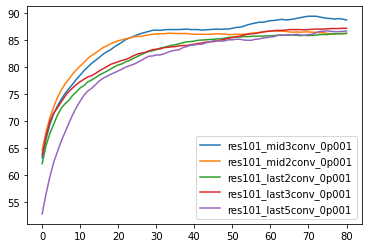

In [40]:
%matplotlib inline

L5 = []

L5.append(["res101_mid3conv_0p001",
[9.708738327026367, 24.2718448638916, 40.77669906616211, 52.42718505859375, 57.28155517578125, 60.194175720214844, 66.01941680908203, 66.01941680908203, 65.04854583740234, 69.90291595458984, 70.87378692626953, 71.84465789794922, 71.84465789794922, 75.72815704345703, 75.72815704345703, 73.78640747070312, 76.69902801513672, 78.64077758789062, 77.66990661621094, 78.64077758789062, 78.64077758789062, 78.64077758789062, 80.58252716064453, 82.5242691040039, 81.55339813232422, 81.55339813232422, 84.46601867675781, 82.5242691040039, 83.49514770507812, 85.4368896484375, 87.3786392211914, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 88.34951782226562, 87.3786392211914, 87.3786392211914, 88.34951782226562, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172, 88.34951782226562, 86.40776824951172, 87.3786392211914, 86.40776824951172, 86.40776824951172, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 89.32038879394531, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 89.32038879394531, 89.32038879394531, 88.34951782226562, 90.291259765625, 91.26213836669922, 90.291259765625, 89.32038879394531, 89.32038879394531, 87.3786392211914, 89.32038879394531, 90.291259765625, 88.34951782226562, 88.34951782226562, 89.32038879394531, 87.3786392211914, 89.32038879394531, 89.32038879394531, 90.291259765625, 90.291259765625, 90.291259765625, 91.26213836669922, 89.32038879394531, 88.34951782226562, 87.3786392211914, 88.34951782226562, 88.34951782226562, 88.34951782226562, 87.3786392211914, 89.32038879394531, 87.3786392211914, 87.3786392211914]
])
L5.append(["res101_mid2conv_0p001",

[17.47572898864746, 29.12621307373047, 43.6893196105957, 46.6019401550293, 57.28155517578125, 62.135921478271484, 66.01941680908203, 65.04854583740234, 69.90291595458984, 70.87378692626953, 72.81553649902344, 70.87378692626953, 73.78640747070312, 76.69902801513672, 75.72815704345703, 76.69902801513672, 78.64077758789062, 77.66990661621094, 80.58252716064453, 81.55339813232422, 82.5242691040039, 82.5242691040039, 83.49514770507812, 82.5242691040039, 84.46601867675781, 85.4368896484375, 83.49514770507812, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 84.46601867675781, 85.4368896484375, 86.40776824951172, 86.40776824951172, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 86.40776824951172, 85.4368896484375, 87.3786392211914, 85.4368896484375, 86.40776824951172, 87.3786392211914, 86.40776824951172, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 86.40776824951172, 87.3786392211914, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 84.46601867675781, 87.3786392211914, 84.46601867675781, 86.40776824951172, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172]
])
L5.append(["res101_last2conv_0p001",

[12.621358871459961, 31.067960739135742, 44.660194396972656, 42.71844482421875, 51.4563102722168, 62.135921478271484, 66.01941680908203, 61.16504669189453, 66.99028778076172, 66.99028778076172, 70.87378692626953, 67.96116638183594, 73.78640747070312, 72.81553649902344, 73.78640747070312, 74.75727844238281, 74.75727844238281, 75.72815704345703, 75.72815704345703, 75.72815704345703, 78.64077758789062, 76.69902801513672, 78.64077758789062, 76.69902801513672, 77.66990661621094, 78.64077758789062, 78.64077758789062, 79.61164855957031, 80.58252716064453, 81.55339813232422, 79.61164855957031, 81.55339813232422, 80.58252716064453, 81.55339813232422, 83.49514770507812, 81.55339813232422, 82.5242691040039, 83.49514770507812, 84.46601867675781, 82.5242691040039, 82.5242691040039, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 84.46601867675781, 83.49514770507812, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 86.40776824951172, 84.46601867675781, 86.40776824951172, 86.40776824951172, 84.46601867675781, 86.40776824951172, 86.40776824951172, 85.4368896484375, 85.4368896484375, 85.4368896484375, 87.3786392211914, 85.4368896484375, 86.40776824951172, 86.40776824951172, 87.3786392211914, 85.4368896484375, 86.40776824951172, 88.34951782226562, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172]
])
L5.append(["res101_last3conv_0p001",
[8.73786449432373, 25.242717742919922, 46.6019401550293, 57.28155517578125, 56.3106803894043, 58.25242614746094, 65.04854583740234, 65.04854583740234, 66.99028778076172, 71.84465789794922, 72.81553649902344, 71.84465789794922, 77.66990661621094, 74.75727844238281, 74.75727844238281, 74.75727844238281, 75.72815704345703, 75.72815704345703, 76.69902801513672, 78.64077758789062, 77.66990661621094, 79.61164855957031, 77.66990661621094, 76.69902801513672, 78.64077758789062, 79.61164855957031, 82.5242691040039, 78.64077758789062, 79.61164855957031, 82.5242691040039, 81.55339813232422, 80.58252716064453, 82.5242691040039, 82.5242691040039, 84.46601867675781, 82.5242691040039, 83.49514770507812, 84.46601867675781, 81.55339813232422, 83.49514770507812, 82.5242691040039, 83.49514770507812, 83.49514770507812, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 84.46601867675781, 84.46601867675781, 82.5242691040039, 85.4368896484375, 83.49514770507812, 84.46601867675781, 85.4368896484375, 85.4368896484375, 84.46601867675781, 84.46601867675781, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 86.40776824951172, 87.3786392211914, 87.3786392211914, 88.34951782226562, 86.40776824951172, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 86.40776824951172, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 88.34951782226562, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172]
])
L5.append(["res101_last5conv_0p001",

[1.9417475461959839, 11.650485038757324, 21.359222412109375, 34.95145797729492, 36.89320373535156, 44.660194396972656, 44.660194396972656, 45.63106918334961, 53.3980598449707, 56.3106803894043, 62.135921478271484, 64.07766723632812, 70.87378692626953, 67.96116638183594, 69.90291595458984, 72.81553649902344, 71.84465789794922, 72.81553649902344, 74.75727844238281, 76.69902801513672, 74.75727844238281, 75.72815704345703, 74.75727844238281, 75.72815704345703, 75.72815704345703, 77.66990661621094, 77.66990661621094, 77.66990661621094, 80.58252716064453, 80.58252716064453, 83.49514770507812, 79.61164855957031, 80.58252716064453, 81.55339813232422, 83.49514770507812, 83.49514770507812, 78.64077758789062, 80.58252716064453, 80.58252716064453, 83.49514770507812, 81.55339813232422, 83.49514770507812, 79.61164855957031, 80.58252716064453, 82.5242691040039, 85.4368896484375, 85.4368896484375, 85.4368896484375, 81.55339813232422, 84.46601867675781, 83.49514770507812, 83.49514770507812, 86.40776824951172, 86.40776824951172, 86.40776824951172, 85.4368896484375, 86.40776824951172, 84.46601867675781, 85.4368896484375, 84.46601867675781, 84.46601867675781, 83.49514770507812, 84.46601867675781, 84.46601867675781, 86.40776824951172, 85.4368896484375, 84.46601867675781, 86.40776824951172, 85.4368896484375, 84.46601867675781, 85.4368896484375, 83.49514770507812, 83.49514770507812, 85.4368896484375, 86.40776824951172, 89.32038879394531, 87.3786392211914, 88.34951782226562, 86.40776824951172, 87.3786392211914, 85.4368896484375, 89.32038879394531, 84.46601867675781, 84.46601867675781, 85.4368896484375, 87.3786392211914, 86.40776824951172, 83.49514770507812, 84.46601867675781, 87.3786392211914, 86.40776824951172, 89.32038879394531, 88.34951782226562, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 88.34951782226562, 87.3786392211914, 89.32038879394531]
])
for e in L5:
     # plt.plot(e[1], label=e[0])
    plt.plot(sliding_mean(e[1],20), label=e[0])
plt.legend()

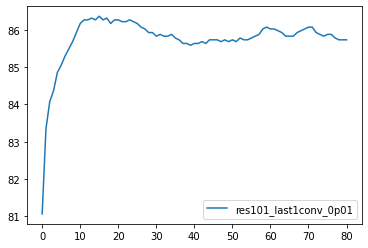

In [41]:

L5 = []

L5.append(["res101_last1conv_0p01",
[41.74757385253906, 69.90291595458984, 80.58252716064453, 75.72815704345703, 82.5242691040039, 82.5242691040039, 82.5242691040039, 82.5242691040039, 81.55339813232422, 82.5242691040039, 83.49514770507812, 86.40776824951172, 85.4368896484375, 85.4368896484375, 85.4368896484375, 88.34951782226562, 86.40776824951172, 87.3786392211914, 84.46601867675781, 86.40776824951172, 87.3786392211914, 84.46601867675781, 86.40776824951172, 85.4368896484375, 86.40776824951172, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 85.4368896484375, 86.40776824951172, 86.40776824951172, 84.46601867675781, 87.3786392211914, 86.40776824951172, 87.3786392211914, 84.46601867675781, 86.40776824951172, 86.40776824951172, 86.40776824951172, 84.46601867675781, 87.3786392211914, 84.46601867675781, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 86.40776824951172, 85.4368896484375, 86.40776824951172, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 87.3786392211914, 86.40776824951172, 85.4368896484375, 86.40776824951172, 86.40776824951172, 85.4368896484375, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 87.3786392211914, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 84.46601867675781, 85.4368896484375, 84.46601867675781, 85.4368896484375, 85.4368896484375, 86.40776824951172, 86.40776824951172, 86.40776824951172, 87.3786392211914, 85.4368896484375, 84.46601867675781, 84.46601867675781, 84.46601867675781, 87.3786392211914, 86.40776824951172, 84.46601867675781, 86.40776824951172, 86.40776824951172, 86.40776824951172]
])

for e in L5:
     # plt.plot(e[1], label=e[0])
    plt.plot(sliding_mean(e[1],20), label=e[0])
plt.legend()

## RES50

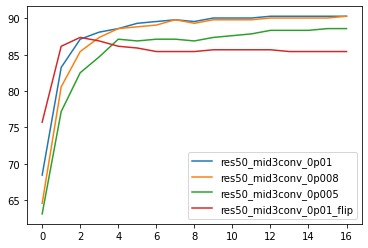

In [2]:
# 0.8 anneal
L5 = []

# L5.append(["res50_last2conv_0p01",
# [30.097087860107422, 73.78640747070312, 77.66990661621094, 83.49514770507812, 84.46601867675781, 82.5242691040039, 83.49514770507812, 86.40776824951172, 86.40776824951172, 85.4368896484375, 87.3786392211914, 86.40776824951172, 86.40776824951172, 86.40776824951172, 88.34951782226562, 87.3786392211914, 87.3786392211914, 88.34951782226562, 88.34951782226562, 87.3786392211914]
# ])

# L5.append(["res50_last3conv_0p01",
# [33.009708404541016, 75.72815704345703, 84.46601867675781, 87.3786392211914, 86.40776824951172, 85.4368896484375, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 88.34951782226562, 86.40776824951172, 87.3786392211914, 87.3786392211914, 87.3786392211914]
# ])

L5.append(["res50_mid3conv_0p01",
[26.213592529296875, 73.78640747070312, 85.4368896484375, 88.34951782226562, 85.4368896484375, 89.32038879394531, 89.32038879394531, 90.291259765625, 88.34951782226562, 90.291259765625, 90.291259765625, 89.32038879394531, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625]
])

# L5.append(["res50_last6conv_0p01",
# [37.864078521728516, 77.66990661621094, 85.4368896484375, 89.32038879394531, 86.40776824951172, 86.40776824951172, 88.34951782226562, 88.34951782226562, 87.3786392211914, 88.34951782226562, 89.32038879394531, 87.3786392211914, 89.32038879394531, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562]
# ])

L5.append(["res50_mid3conv_0p008",
[23.30097007751465, 69.90291595458984, 79.61164855957031, 85.4368896484375, 87.3786392211914, 89.32038879394531, 87.3786392211914, 90.291259765625, 88.34951782226562, 90.291259765625, 90.291259765625, 88.34951782226562, 90.291259765625, 90.291259765625, 90.291259765625, 89.32038879394531, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625]
])
L5.append(["res50_mid3conv_0p005",

[31.067960739135742, 65.04854583740234, 78.64077758789062, 77.66990661621094, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 87.3786392211914, 87.3786392211914, 86.40776824951172, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562]
])
L5.append(["res50_mid3conv_0p01_flip",

[44.660194396972656, 82.5242691040039, 87.3786392211914, 88.34951782226562, 86.40776824951172, 87.3786392211914, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 86.40776824951172, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375, 85.4368896484375]
])
for e in L5:
     # plt.plot(e[1], label=e[0])
    plt.plot(sliding_mean(e[1],4), label=e[0])
plt.legend()

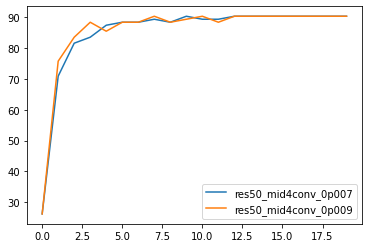

In [6]:
L5 = []


L5.append(["res50_mid4conv_0p007",
[26.213592529296875, 70.87378692626953, 81.55339813232422, 83.49514770507812, 87.3786392211914, 88.34951782226562, 88.34951782226562, 89.32038879394531, 88.34951782226562, 90.291259765625, 89.32038879394531, 89.32038879394531, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625]
])
L5.append(["res50_mid4conv_0p009",

[26.213592529296875, 75.72815704345703, 83.49514770507812, 88.34951782226562, 85.4368896484375, 88.34951782226562, 88.34951782226562, 90.291259765625, 88.34951782226562, 89.32038879394531, 90.291259765625, 88.34951782226562, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625, 90.291259765625]
])

for e in L5:
     # plt.plot(e[1], label=e[0])
    plt.plot(sliding_mean(e[1],1), label=e[0])
plt.legend()